## ML and scikit-learn

In [3]:
import pandas as pd
# matplotlib big library, just need part of it. 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# Build a dataframe

df = pd.DataFrame()
df["Area"] = [2600, 3000, 3200, 3600, 4000]
df["Price"] = [550000, 565000, 610000, 680000, 725000]

In [5]:
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [6]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_doc

In [7]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single numeric RGB or RGBA sequence
    

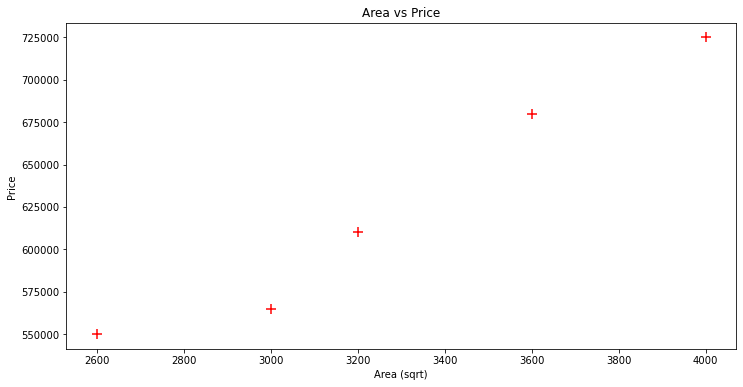

In [16]:
## Basic plotting

x_axis = df["Area"]
y_axis = df["Price"]

plt.figure(figsize=(12,6))
plt.scatter(x_axis, y_axis, c="red", s=100, marker="+")
plt.title("Area vs Price")
plt.xlabel("Area (sqrt)")
plt.ylabel("Price")

plt.show()

In [25]:
## How to find the fit for the line
## y = m (slope) * sqft + b (intercept)

X = df[["Area"]].values ## nested square brackets, make X.ndim = 2. ## do "values" just to bypass
y = df["Price"]

In [26]:
X.ndim

2

In [27]:
model = LinearRegression()

In [28]:
model.fit(X, y) # X is matrix

LinearRegression()

In [29]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [31]:
model.predict([[3300]])

array([628715.75342466])

In [35]:
## Look at the coefficient
## y = m * 3300 + b

m = model.coef_[0]
b = model.intercept_

In [36]:
print(m, b)

135.78767123287673 180616.43835616432


In [37]:
predicted = model.predict(X)

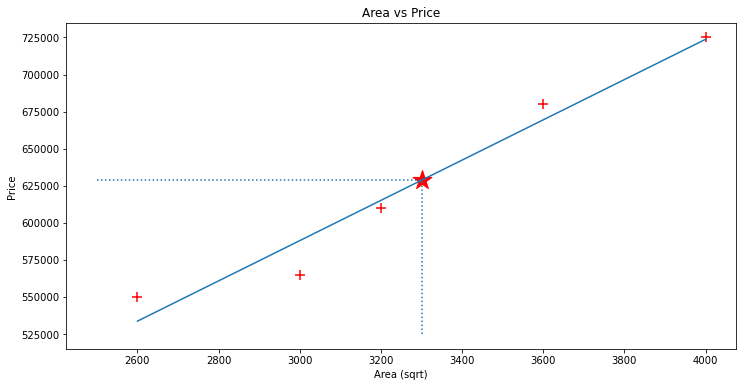

In [43]:
## Basic plotting

x_axis = df["Area"]
y_axis = df["Price"]

plt.figure(figsize=(12,6))
plt.scatter(x_axis, y_axis, c="red", s=100, marker="+")
plt.scatter(3300, model.predict([[3300]]), c="red", marker="*", s=400)
plt.plot(x_axis, predicted)
plt.vlines(3300, ymin=525000, ymax=model.predict([[3300]]), linestyles=":")
plt.hlines(model.predict([[3300]]), xmin=2500, xmax=3300, linestyles=":")
plt.title("Area vs Price")
plt.xlabel("Area (sqrt)")
plt.ylabel("Price")

plt.show()

## Predict price for 5000 sqft hous and plot it

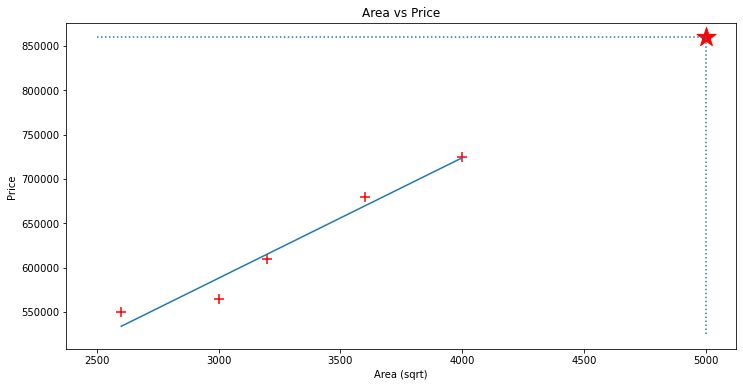

[859554.79452055]


In [47]:
## Predict price for 5000 sqft house and plot it

x_axis = df["Area"]
y_axis = df["Price"]

plt.figure(figsize=(12,6))
plt.scatter(x_axis, y_axis, c="red", s=100, marker="+")
plt.scatter(5000, model.predict([[5000]]), c="red", marker="*", s=400)
plt.plot(x_axis, predicted)
plt.vlines(5000, ymin=525000, ymax=model.predict([[5000]]), linestyles=":")
plt.hlines(model.predict([[5000]]), xmin=2500, xmax=5000, linestyles=":")
plt.title("Area vs Price")
plt.xlabel("Area (sqrt)")
plt.ylabel("Price")

plt.show()

print(model.predict([[5000]]))